In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("yield_df.csv")

In [6]:
print(" First 5 Rows ")
print(df.head())

 First 5 Rows 
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  


In [7]:
print("\n Dataset Info ")
print(df.info())


 Dataset Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB
None


In [8]:
print("\n Statistical Summary ")
print(df.describe())


 Statistical Summary 
         Unnamed: 0          Year    hg/ha_yield  \
count  28242.000000  28242.000000   28242.000000   
mean   14120.500000   2001.544296   77053.332094   
std     8152.907488      7.051905   84956.612897   
min        0.000000   1990.000000      50.000000   
25%     7060.250000   1995.000000   19919.250000   
50%    14120.500000   2001.000000   38295.000000   
75%    21180.750000   2008.000000  104676.750000   
max    28241.000000   2013.000000  501412.000000   

       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
count                    28242.00000       28242.000000  28242.000000  
mean                      1149.05598       37076.909344     20.542627  
std                        709.81215       59958.784665      6.312051  
min                         51.00000           0.040000      1.300000  
25%                        593.00000        1702.000000     16.702500  
50%                       1083.00000       17529.440000     21.510000  
75% 

In [9]:
print("\n Missing Values Count ")
print(df.isnull().sum())


 Missing Values Count 
Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [10]:
df = df.dropna()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

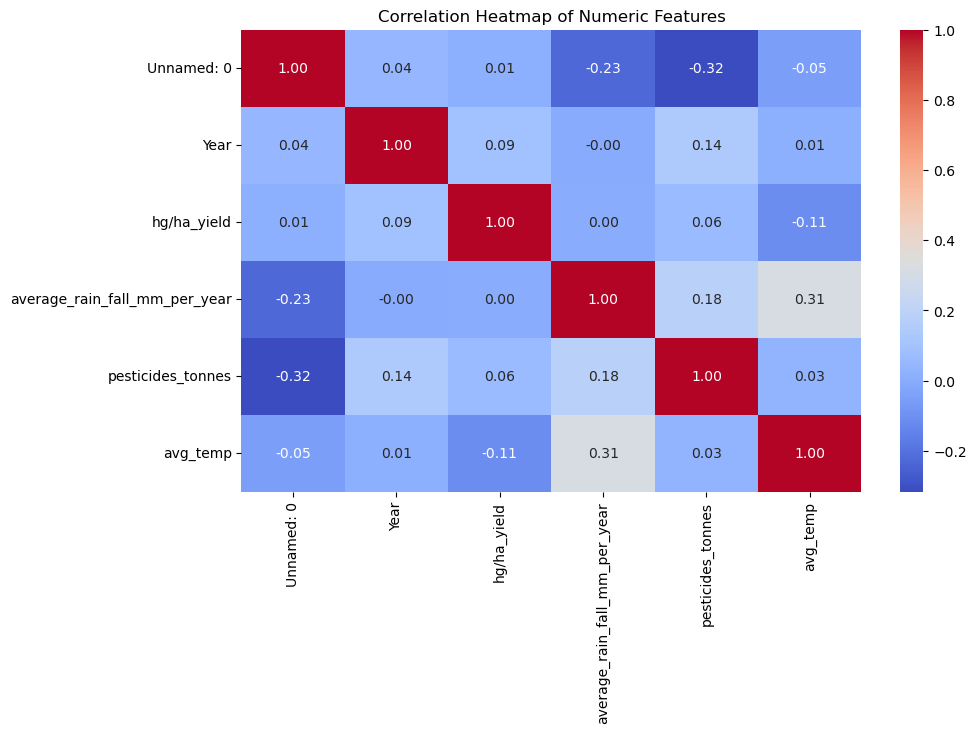

In [13]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



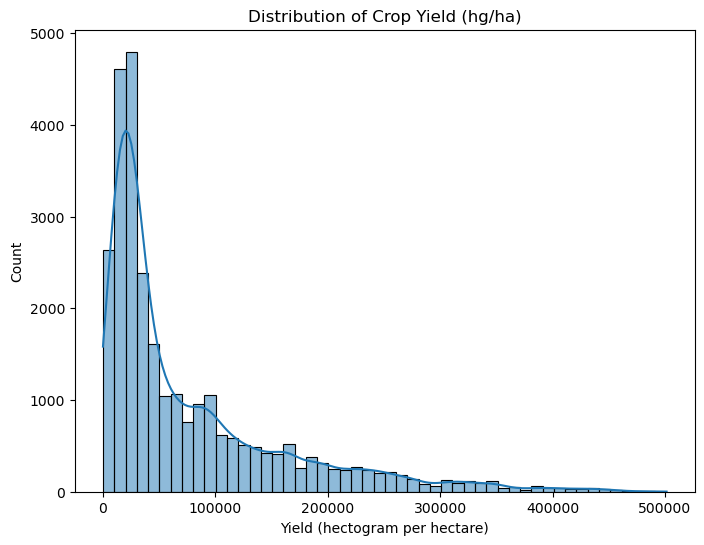

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(df['hg/ha_yield'], bins=50, kde=True)
plt.title("Distribution of Crop Yield (hg/ha)")
plt.xlabel("Yield (hectogram per hectare)")
plt.ylabel("Count")
plt.show()


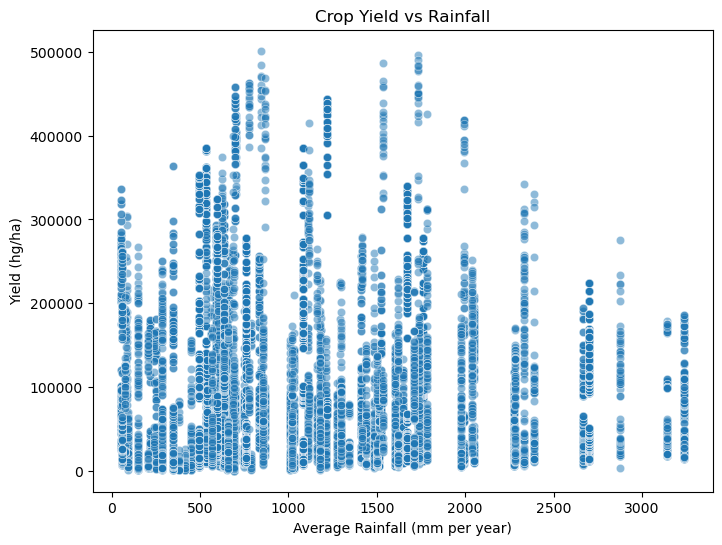

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="average_rain_fall_mm_per_year", y="hg/ha_yield", data=df, alpha=0.5)
plt.title("Crop Yield vs Rainfall")
plt.xlabel("Average Rainfall (mm per year)")
plt.ylabel("Yield (hg/ha)")
plt.show()


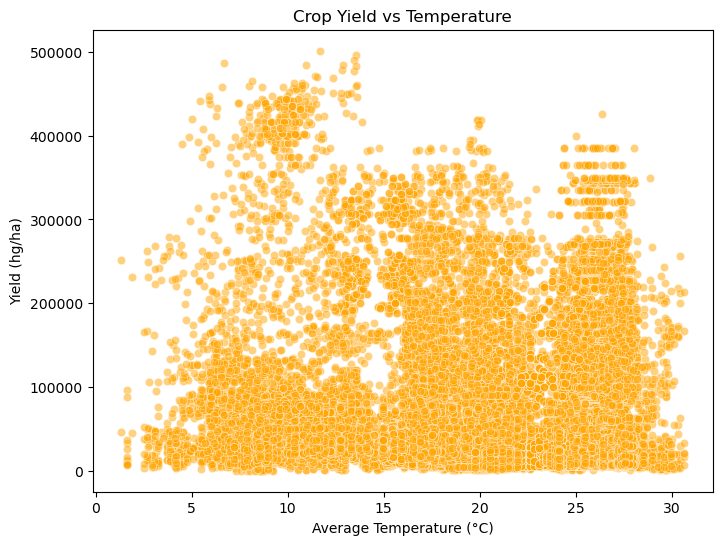

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="avg_temp", y="hg/ha_yield", data=df, alpha=0.5, color="orange")
plt.title("Crop Yield vs Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Yield (hg/ha)")
plt.show()


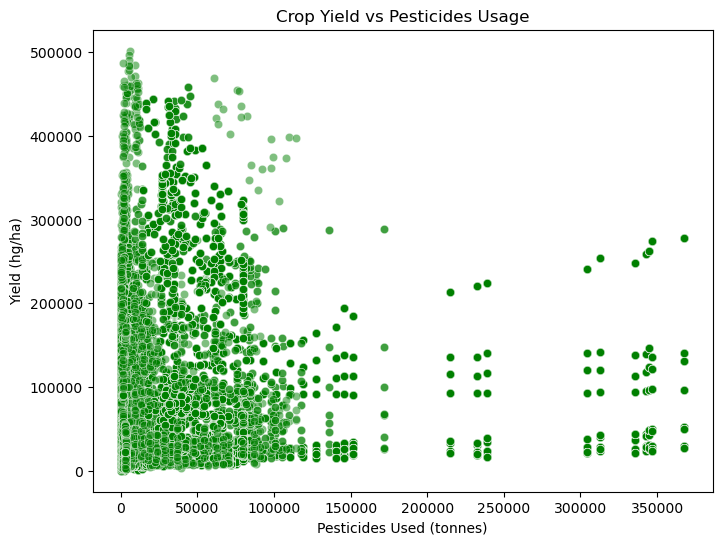

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="pesticides_tonnes", y="hg/ha_yield", data=df, alpha=0.5, color="green")
plt.title("Crop Yield vs Pesticides Usage")
plt.xlabel("Pesticides Used (tonnes)")
plt.ylabel("Yield (hg/ha)")
plt.show()


In [18]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
le_area = LabelEncoder()
df_encoded['Area'] = le_area.fit_transform(df['Area'])
le_item = LabelEncoder()
df_encoded['Item'] = le_item.fit_transform(df['Item'])
print("After Encoding:")
print(df_encoded.head())


After Encoding:
   Unnamed: 0  Area  Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0           0     0     1  1990        36613                         1485.0   
1           1     0     3  1990        66667                         1485.0   
2           2     0     4  1990        23333                         1485.0   
3           3     0     5  1990        12500                         1485.0   
4           4     0     6  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37  


In [19]:
correlation = df_encoded.corr()['hg/ha_yield'].sort_values(ascending=False)
print("Correlation of features with Crop Yield:")
print(correlation)


Correlation of features with Crop Yield:
hg/ha_yield                      1.000000
Year                             0.091630
pesticides_tonnes                0.064085
Unnamed: 0                       0.013395
Area                             0.006672
average_rain_fall_mm_per_year    0.000962
avg_temp                        -0.114777
Item                            -0.225103
Name: hg/ha_yield, dtype: float64
